# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | newport
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | laojunmiao
Processing Record 4 of Set 1 | dudinka
Processing Record 5 of Set 1 | paphos
Processing Record 6 of Set 1 | wauseon
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | rawai
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | acarau
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | emerald
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | kloulklubed
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | miri
Processing Record 22 of Set 1 | marsh harbour
Pr

Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | batangafo
Processing Record 43 of Set 4 | palikir - national government center
Processing Record 44 of Set 4 | bunia
Processing Record 45 of Set 4 | quellon
Processing Record 46 of Set 4 | manay
Processing Record 47 of Set 4 | bahia de kino
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | artesia
Processing Record 0 of Set 5 | badger
Processing Record 1 of Set 5 | santa ana
Processing Record 2 of Set 5 | phillip island
Processing Record 3 of Set 5 | tromso
Processing Record 4 of Set 5 | yanam
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | palu
Processing Record 8 of Set 5 | masterton
Processing Record 9 of Set 5 | vadso
Processing Record 10 of Set 5 | beyneu
Processing Record 11 of Set 5 | khuzdar
Processing Record 12 of Set 5 | santa flavia
Processing Record 13 of Set 5 | kodiak
Processing Record 14 of Set 5 | eas

Processing Record 34 of Set 8 | nadi
Processing Record 35 of Set 8 | hegang
Processing Record 36 of Set 8 | turkmenbasy
Processing Record 37 of Set 8 | pingshan
Processing Record 38 of Set 8 | santiago de cao
Processing Record 39 of Set 8 | rockland
Processing Record 40 of Set 8 | el granada
Processing Record 41 of Set 8 | mogocha
Processing Record 42 of Set 8 | port alfred
Processing Record 43 of Set 8 | caburan
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | hancheng
Processing Record 46 of Set 8 | el calafate
Processing Record 47 of Set 8 | inarajan village
Processing Record 48 of Set 8 | manhattan
Processing Record 49 of Set 8 | derzhavinsk
Processing Record 0 of Set 9 | papao
Processing Record 1 of Set 9 | mejit
Processing Record 2 of Set 9 | saint-paul
Processing Record 3 of Set 9 | okondja
Processing Record 4 of Set 9 | sofifi
City not found. Skipping...
Processing Record 5 of Set 9 | la'ie
Processing Record 6 of Set 9 | nanakuli
Processing Record 7 of 

Processing Record 25 of Set 12 | progreso
Processing Record 26 of Set 12 | turpan
Processing Record 27 of Set 12 | manta
Processing Record 28 of Set 12 | ta`u
Processing Record 29 of Set 12 | grand baie
Processing Record 30 of Set 12 | klyuchi
Processing Record 31 of Set 12 | queenstown
Processing Record 32 of Set 12 | gremda
Processing Record 33 of Set 12 | presidente olegario
Processing Record 34 of Set 12 | mutuali
Processing Record 35 of Set 12 | estes park
Processing Record 36 of Set 12 | esmeralda
Processing Record 37 of Set 12 | estevan
Processing Record 38 of Set 12 | kouvola
Processing Record 39 of Set 12 | grand falls-windsor
Processing Record 40 of Set 12 | baile herculane
Processing Record 41 of Set 12 | cambria
Processing Record 42 of Set 12 | wiang sa
Processing Record 43 of Set 12 | rabaul
Processing Record 44 of Set 12 | san patricio
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,newport,51.5877,-2.9984,20.43,74,90,4.73,GB,1691407161
1,yellowknife,62.4560,-114.3525,12.29,76,75,3.09,CA,1691407161
2,laojunmiao,39.8333,97.7333,29.19,18,100,8.37,CN,1691407161
3,dudinka,69.4058,86.1778,25.90,34,3,4.50,RU,1691406893
4,paphos,34.7667,32.4167,31.24,66,20,7.72,CY,1691407162


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,newport,51.5877,-2.9984,20.43,74,90,4.73,GB,1691407161
1,yellowknife,62.4560,-114.3525,12.29,76,75,3.09,CA,1691407161
2,laojunmiao,39.8333,97.7333,29.19,18,100,8.37,CN,1691407161
3,dudinka,69.4058,86.1778,25.90,34,3,4.50,RU,1691406893
4,paphos,34.7667,32.4167,31.24,66,20,7.72,CY,1691407162


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

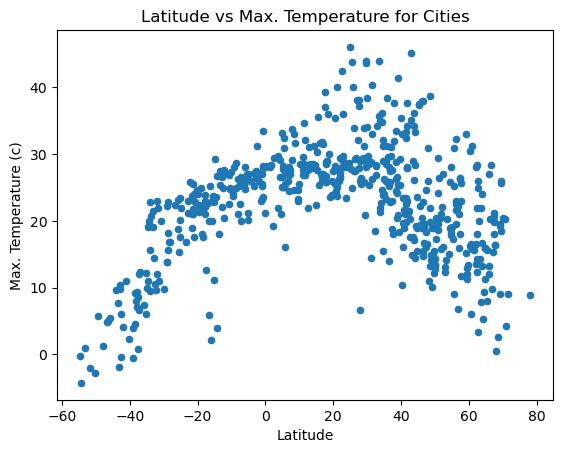

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat', 'Max Temp')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max. Temperature (c)')
plt.title('Latitude vs Max. Temperature for Cities')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

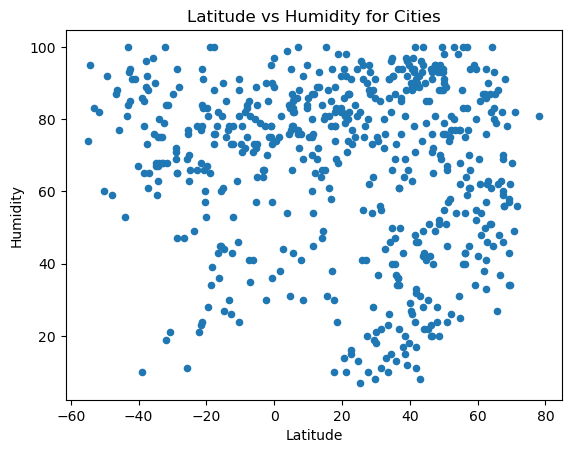

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity for Cities')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

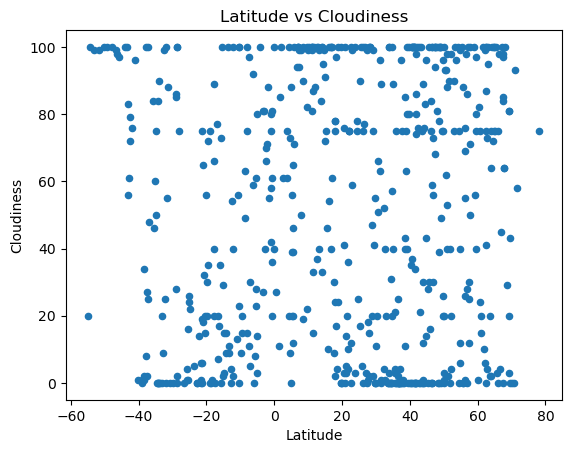

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

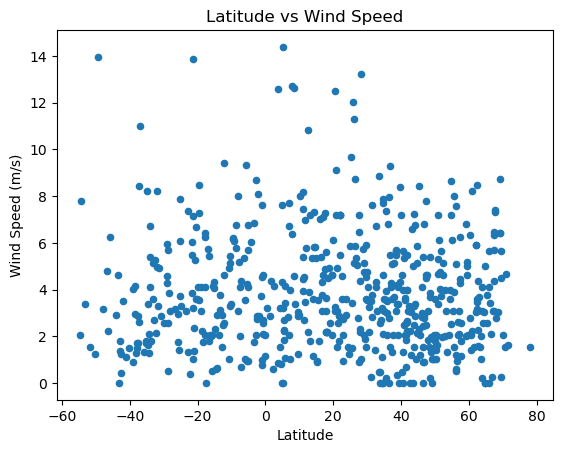

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regressor5000(x_values, y_values, xlab, ylab, title):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #print rvalue
    print(f"Rvalue = {rvalue}")
    print(f"Rvalue^2 = {rvalue**2}")
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)

    #Add labels
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

    plt.plot(x_values, regress_values, "r-")

    plt.annotate(line_eq, xy=(x_values.min(), y_values.max()), fontsize=15, color="red")
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,newport,51.5877,-2.9984,20.43,74,90,4.73,GB,1691407161
1,yellowknife,62.4560,-114.3525,12.29,76,75,3.09,CA,1691407161
2,laojunmiao,39.8333,97.7333,29.19,18,100,8.37,CN,1691407161
3,dudinka,69.4058,86.1778,25.90,34,3,4.50,RU,1691406893
4,paphos,34.7667,32.4167,31.24,66,20,7.72,CY,1691407162


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,edinburgh of the seven seas,-37.0676,-12.3116,12.30,65,48,11.02,SH,1691407162
7,margaret river,-33.9500,115.0667,15.56,80,90,5.38,AU,1691407036
11,puerto ayora,-0.7393,-90.3518,23.64,90,61,2.68,EC,1691407163
12,acarau,-2.8856,-40.1200,27.46,66,81,8.67,BR,1691407027
14,blackmans bay,-43.0167,147.3167,9.74,84,83,1.79,AU,1691407164


###  Temperature vs. Latitude Linear Regression Plot

Rvalue = -0.5234783785582264
Rvalue^2 = 0.2740296128179498


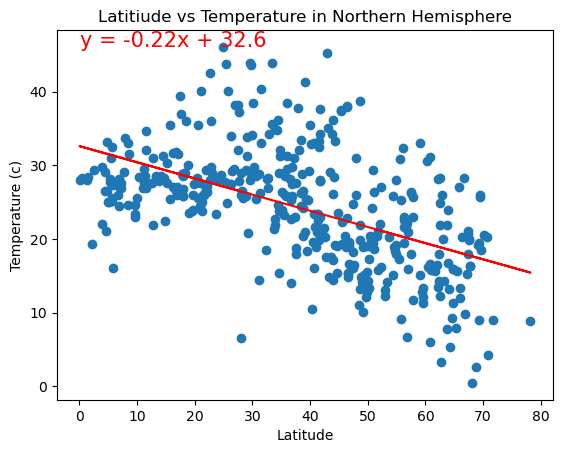

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlab = "Latitude"
ylab = "Temperature (c)"
title = "Latitiude vs Temperature in Northern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

Rvalue = 0.8250132102426907
Rvalue^2 = 0.6806467970749501


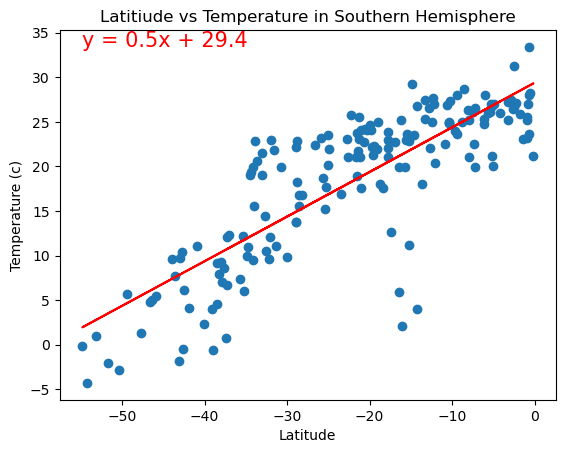

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlab = "Latitude"
ylab = "Temperature (c)"
title = "Latitiude vs Temperature in Southern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Rvalue = -0.09038938158024243
Rvalue^2 = 0.00817024030245867


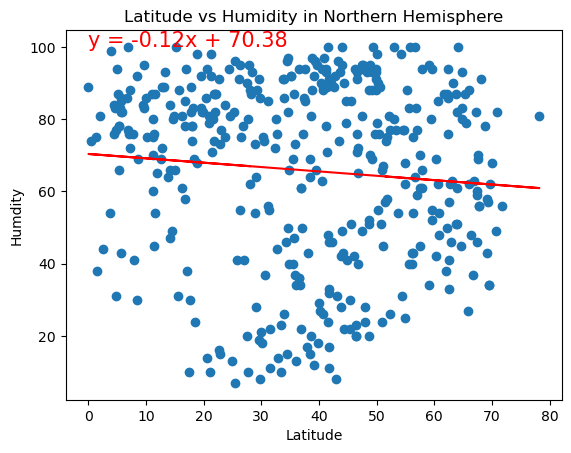

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlab = "Latitude"
ylab = "Humdity"
title = "Latitude vs Humidity in Northern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

Rvalue = -0.1483244728197748
Rvalue^2 = 0.02200014923726411


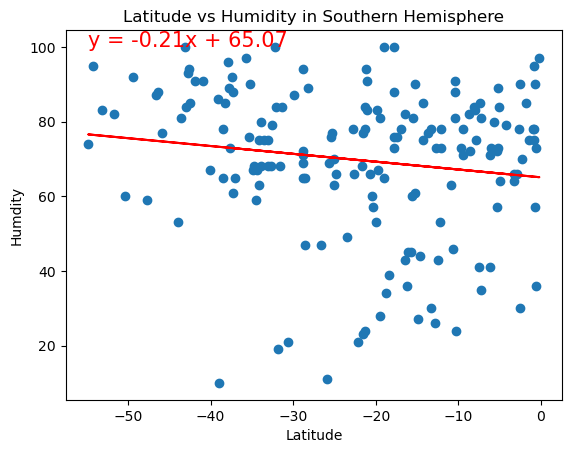

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlab = "Latitude"
ylab = "Humdity"
title = "Latitude vs Humidity in Southern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Rvalue = -0.16442646678146144
Rvalue^2 = 0.027036062978235045


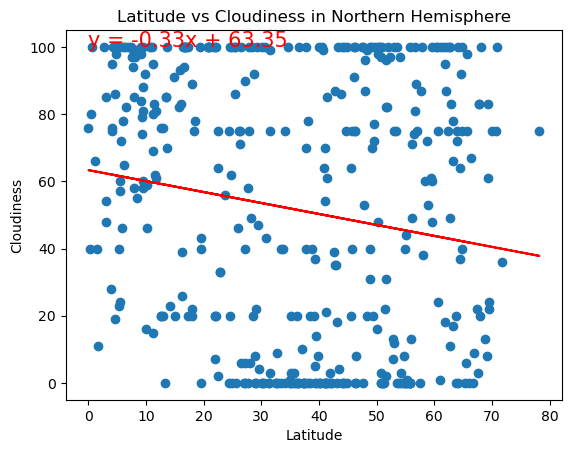

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlab = "Latitude"
ylab = "Cloudiness"
title = "Latitude vs Cloudiness in Northern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

Rvalue = -0.12003720631422324
Rvalue^2 = 0.014408930899723395


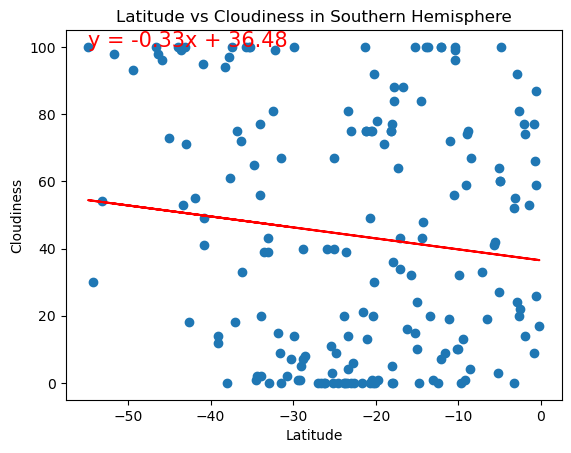

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlab = "Latitude"
ylab = "Cloudiness"
title = "Latitude vs Cloudiness in Southern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Rvalue = -0.1337486600126666
Rvalue^2 = 0.017888704055183884


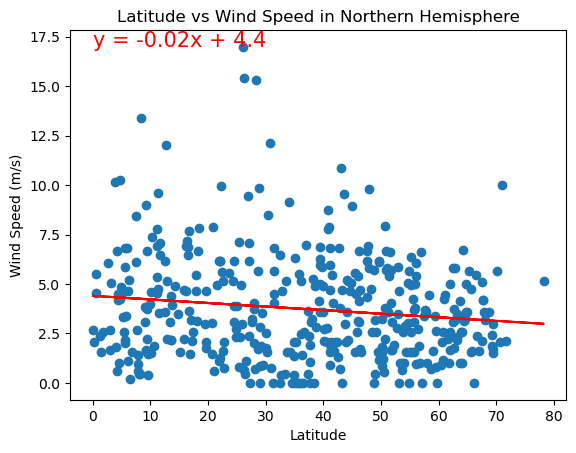

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlab = "Latitude"
ylab = "Wind Speed (m/s)"
title = "Latitude vs Wind Speed in Northern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

Rvalue = -0.10448420416856861
Rvalue^2 = 0.010916948920739132


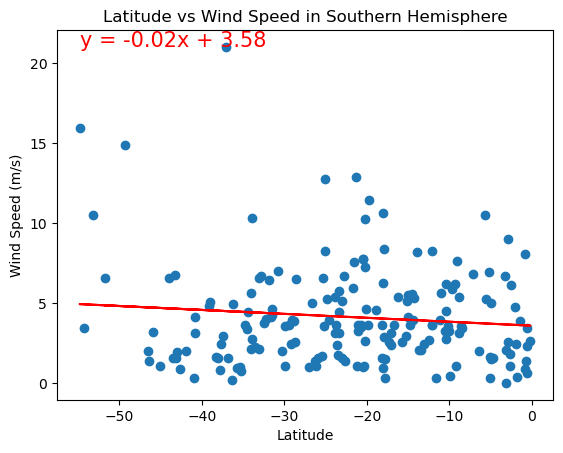

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlab = "Latitude"
ylab = "Wind Speed (m/s)"
title = "Latitude vs Wind Speed in Southern Hemisphere"

regressor5000(x_values, y_values, xlab, ylab, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE